## Python Libraray Packages

In [1]:
import pandas as load_dataset_file
import numpy as math_cal
import seaborn as sns_grpy
import matplotlib.pyplot as plt_grpy
import os
import cv2
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split as splittingprocess
from tensorflow.keras import layers as lyr
from tensorflow.keras import models as mdl
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

## Import Metadataset and HAM10000 images part 1 and part 2

In [2]:
# Load metadata and image data
metadata = load_dataset_file.read_csv('D:/Dataset/HAM10000_metadata.csv')
HAMimages_part_1 = 'D:/Dataset//Data/HAM10000_images_part_1'
HAM_images_part_2 = 'D:/Dataset/Data/HAM10000_images_part_2'

In [4]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [3]:
# Create a dictionary to map each class to a numerical value
dictonary_mapping_class = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
# Create a new column 'label' to map the class names to numerical values
metadata['label'] = metadata['dx'].map(dictonary_mapping_class)

In [5]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [23]:
metadata.columns.values

array(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex',
       'localization', 'label'], dtype=object)

In [24]:
print(metadata.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
label            0
dtype: int64


In [25]:
metadata = metadata.dropna()

In [26]:
print(metadata.isnull().sum())

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
label           0
dtype: int64


## Exploratory Data Analysis and data visualization:

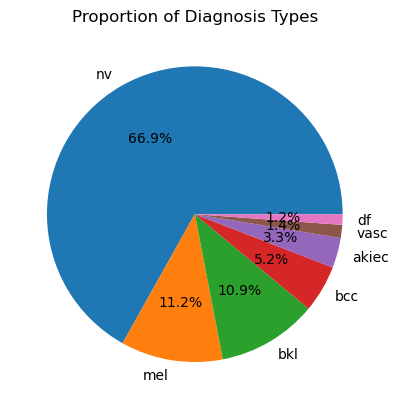

In [27]:
plt_grpy.pie(metadata['dx'].value_counts().values, labels=metadata['dx'].value_counts().index, autopct='%1.1f%%')
plt_grpy.title('Proportion of Diagnosis Types')
plt_grpy.show()

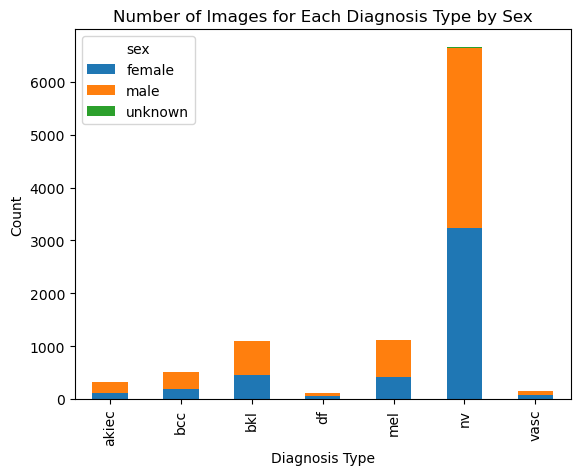

In [29]:
ty = load_dataset_file.crosstab(metadata['dx'], metadata['sex'])
ty.plot(kind='bar', stacked=True)
plt_grpy.title('Number of Images for Each Diagnosis Type by Sex')
plt_grpy.xlabel('Diagnosis Type')
plt_grpy.ylabel('Count')
plt_grpy.show()

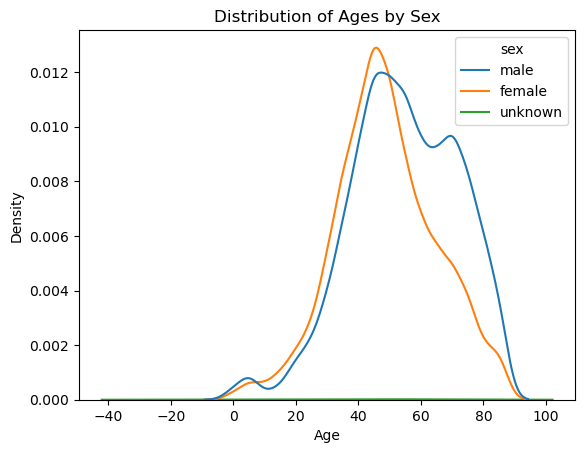

In [30]:
sns_grpy.kdeplot(data=metadata, x='age', hue='sex')
plt_grpy.title('Distribution of Ages by Sex')
plt_grpy.xlabel('Age')
plt_grpy.ylabel('Density')
plt_grpy.show()

## Implementation

### Data Preprocessing

In [6]:
# Function to read images and resize them to 224x224 pixels
def img_visualization_funct(filepath):
    imges = cv2.imread(filepath)
    imges = cv2.resize(imges, (224,224))
    return imges

In [7]:
# load the HAM images as well as store them within a numpy array
HAMimages = []
for HAMimage_name in metadata['image_id']:
    if os.path.isfile(os.path.join(HAMimages_part_1, HAMimage_name + '.jpg')):
        imges = img_visualization_funct(os.path.join(HAMimages_part_1, HAMimage_name + '.jpg'))
        HAMimages.append(imges)
    else:
        imges = img_visualization_funct(os.path.join(HAM_images_part_2, HAMimage_name + '.jpg'))
        HAMimages.append(imges)
HAMimages = math_cal.array(HAMimages)

In [8]:
# Convert the images and labels to numpy arrays
HAMimages = math_cal.array(HAMimages)
HAMlabels = math_cal.array(metadata['label'])

In [9]:
# HAM image and CSV dataset  has been splited between trainning and testing format
Xtrainset, Xtestset, ytrainset, ytestset = splittingprocess(HAMimages, HAMlabels, test_size=0.2, random_state=42)

### Neural Network Algorithms

In [10]:
# Execute codes for CNN model
cnnmodel = mdl.Sequential([
    lyr.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    lyr.MaxPooling2D((2, 2)),
    lyr.Conv2D(64, (3, 3), activation='relu'),
    lyr.MaxPooling2D((2, 2)),
    lyr.Conv2D(128, (3, 3), activation='relu'),
    lyr.MaxPooling2D((2, 2)),
    lyr.Flatten(),
    lyr.Dense(128, activation='relu'),
    lyr.Dense(7, activation='softmax')
])

In [11]:
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Here CNN model has been trained with respect to the test dataset
cnnmodel_model_hist = cnnmodel.fit(Xtrainset, ytrainset, epochs=10, validation_data=(Xtestset, ytestset))

Epoch 1/10
251/251 [==============================] - 292s 1s/step - loss: 9.9481 - accuracy: 0.6516 - val_loss: 1.0236 - val_accuracy: 0.6695
Epoch 2/10
251/251 [==============================] - 297s 1s/step - loss: 0.9297 - accuracy: 0.6754 - val_loss: 0.9296 - val_accuracy: 0.6720
Epoch 3/10
251/251 [==============================] - 292s 1s/step - loss: 0.8978 - accuracy: 0.6820 - val_loss: 0.9117 - val_accuracy: 0.6770
Epoch 4/10
251/251 [==============================] - 294s 1s/step - loss: 0.8536 - accuracy: 0.6970 - val_loss: 0.9445 - val_accuracy: 0.6795
Epoch 5/10
251/251 [==============================] - 288s 1s/step - loss: 0.8209 - accuracy: 0.7068 - val_loss: 0.9733 - val_accuracy: 0.6700
Epoch 6/10
251/251 [==============================] - 277s 1s/step - loss: 0.8082 - accuracy: 0.7234 - val_loss: 0.9547 - val_accuracy: 0.6735
Epoch 7/10
251/251 [==============================] - 278s 1s/step - loss: 0.8134 - accuracy: 0.7244 - val_loss: 0.9929 - val_accuracy: 0.6790

In [15]:
# Making predictions based on the test dataset
modelpredictval = math_cal.argmax(cnnmodel.predict(Xtestset), axis=-1)

63/63 [==============================] - 14s 211ms/step


In [16]:
# Eveluate metrics
modelaccuracy = accuracy_score(ytestset, modelpredictval)
modelf1val = f1_score(ytestset, modelpredictval, average='weighted')
modelprec = precision_score(ytestset, modelpredictval, average='weighted')
modelrecallval = recall_score(ytestset, modelpredictval, average='weighted')
confusmatrix = confusion_matrix(ytestset, modelpredictval)

In [17]:
# Print evaluation metrics
print('CNN Model Accuracy is Shown as:', modelaccuracy)
print('CNN Model F1 Score is shown as :', modelf1val)
print('CNN Model Precision is  Shown as :', modelprec)
print('CNN model Recall value is shown as :', modelrecallval)

CNN Model Accuracy is Shown as: 0.672491263105342
CNN Model F1 Score is shown as : 0.6308670250736165
CNN Model Precision is  Shown as : 0.6115257282086123
CNN model Recall value is shown as : 0.672491263105342


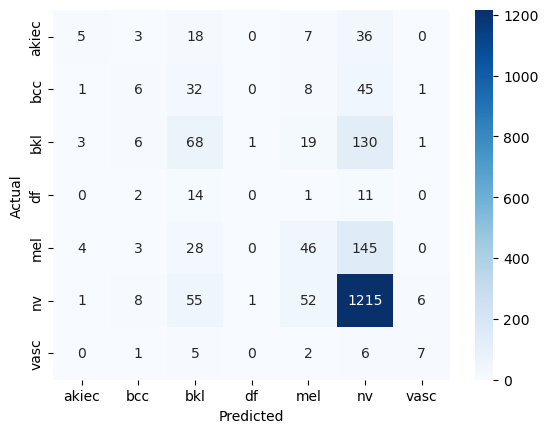

In [21]:
# Plotting the confusion matrix
sns_grpy.heatmap(confusmatrix, annot=True, cmap=plt_grpy.cm.Blues, fmt='g', xticklabels=dictonary_mapping_class.keys(), yticklabels=dictonary_mapping_class.keys())
plt_grpy.xlabel('Predicted')
plt_grpy.ylabel('Actual')
plt_grpy.show()

In [22]:
# Print classification report
print(classification_report(ytestset, modelpredictval, target_names=dictonary_mapping_class.keys()))

              precision    recall  f1-score   support

       akiec       0.36      0.07      0.12        69
         bcc       0.21      0.06      0.10        93
         bkl       0.31      0.30      0.30       228
          df       0.00      0.00      0.00        28
         mel       0.34      0.20      0.25       226
          nv       0.77      0.91      0.83      1338
        vasc       0.47      0.33      0.39        21

    accuracy                           0.67      2003
   macro avg       0.35      0.27      0.29      2003
weighted avg       0.61      0.67      0.63      2003

